<a href="https://colab.research.google.com/github/hashmis79/SRAAssignments/blob/master/RotateImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(322, 600, 4)
Enter the Angle by which you want to rotate the image90


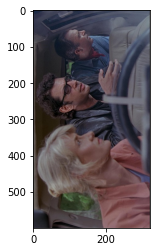

In [ ]:
import numpy as np
from PIL import Image
import math as m
import matplotlib.pyplot as plt

def getRotMat(h,w,angle):
  cos = m.cos(angle*np.pi/180)
  sin = m.sin(angle*np.pi/180)
  return np.array([[cos,sin],[-sin,cos]])

def checkNegative(matrix):
  u = list()
  v = list()
  v.append(int((image.shape[1]-1)*matrix[0,0]+(0)*matrix[0,1]))
  v.append(int((0)*matrix[0,0]+(image.shape[0]-1)*matrix[0,1]))
  v.append(int((image.shape[1]-1)*matrix[0,0]+(image.shape[0]-1)*matrix[0,1]))
  u.append(int((image.shape[1]-1)*matrix[1,0]+(0)*matrix[1,1]))
  u.append(int((0)*matrix[1,0]+(image.shape[0]-1)*matrix[1,1]))
  u.append(int((image.shape[1]-1)*matrix[1,0]+(image.shape[0]-1)*matrix[1,1]))
  if min(u)<0 and min(v)<0:
    return -(min(u)),-(min(v))
  elif min(u)<0:
    return -(min(u)),0
  elif min(v)<0:
    return 0,-(min(v))
  else:
    return 0,0

  

image = plt.imread('rotate.png')
print(image.shape)
angle = int(input('Enter the Angle by which you want to rotate the image'))
matrix = getRotMat(image.shape[0],image.shape[1],angle)
cos = abs(matrix[0,0])
sin = abs(matrix[0,1])
newWidth = int((image.shape[0] * sin) + (image.shape[1] * cos))
newHeight = int((image.shape[0] * cos) + (image.shape[1] * sin))
x = newWidth-image.shape[1]/2
y = newHeight-image.shape[0]/2
np1 = np.zeros((newHeight,newWidth,image.shape[2]),dtype = image.dtype)
# z1 = int((image.shape[0]-1)*matrix[0,0]+(0)*matrix[0,1])
# z2 = int((image.shape[0]-1)*matrix[0,0]+(image.shape[1]-1)*matrix[0,1])
z1,z2 = checkNegative(matrix)
for s in range(image.shape[2]):
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      v = int((j)*matrix[0,0]+(i)*matrix[0,1]+z2)
      u = int((j)*matrix[1,0]+(i)*matrix[1,1]+z1)
      np1[u,v,s] = image[i,j,s]

plt.imshow(np1)

Choose and option
1)Vertical Edge detection
2)Horizontal Edge detection
3)Sobel edge detection
4)Canny Edge Detection2
(340, 340, 3)


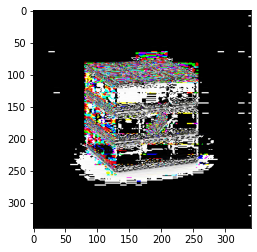

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def applyPadding(array):
  new = np.zeros((array.shape[0]+4,array.shape[1]+4,array.shape[2]),dtype = array.dtype)
  for s in range(array.shape[2]):
    for i in range(array.shape[0]):
      for j in range(array.shape[1]):
        new[i+2,j+2,s] = array[i,j,s]
  return new

def applyKernel(kernel,matrix):
  padded_Matrix = applyPadding(matrix)
  filtered = np.zeros((matrix.shape[0],matrix.shape[1],matrix.shape[2]),dtype = matrix.dtype)
  for s in range(matrix.shape[2]):
    for i in range(matrix.shape[0]):
      for j in range(matrix.shape[1]):
        sum = 0.0
        for y in range(kernel.shape[0]):
          for x in range(kernel.shape[1]):
            sum = sum + kernel[y,x]*padded_Matrix[i+y,j+x,s]
        filtered[i,j,s] = sum
  return filtered     

image = plt.imread('blur.jpeg')
option = ('Choose and option\n1)Blur1\n2)Blur2\n3)Blur3\n4)Sharpen')
print(image.shape)
if option == 1:
  kernel_box = np.array([[0.04,0.04,0.04,0.04,0.04],[0.04,0.04,0.04,0.04,0.04],[0.04,0.04,0.04,0.04,0.04],[0.04,0.04,0.04,0.04,0.04],[0.04,0.04,0.04,0.04,0.04]])
elif option == 2:
  kernel_box = np.array([[(1/273),(4/273),(7/273),(4/273),(1/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(7/273),(26/273),(41/273),(26/273),(7/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(1/273),(4/273),(7/273),(4/273),(1/273)]])
elif option == 3:
  print(unavailable)
elif option == 4:
  kernel_box = np.array([[-0.00391,-0.01563,-0.02344,-0.01563,-0.00391],[-0.01563,-0.06250,-0.09375,-0.06250,-0.01563],[-0.02344,-0.09375,1.85938,-0.09375,-0.02344],[-0.01563,-0.06250,-0.09375,-0.06250,-0.01563],[-0.00391,-0.01563,-0.02344,-0.01563,-0.00391]])
filtered = applyKernel(kernel_box,image)
# plt.imshow(image)
plt.imshow(filtered)

Choose and option
1)Vertical Edge detection
2)Horizontal Edge detection
3)Sobel edge detection
4)Canny Edge Detection3
(340, 340, 3)
(344, 344, 3)
(342, 342, 3)
(342, 342, 3)


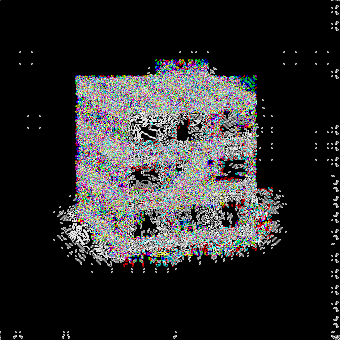

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def applyPadding(array,x):
  new = np.zeros((array.shape[0]+(2*x),array.shape[1]+(2*x),array.shape[2]),dtype = array.dtype)
  for s in range(array.shape[2]):
    for i in range(array.shape[0]):
      for j in range(array.shape[1]):
        new[i+int(x/2),j+int(x/2),s] = array[i,j,s]
  return new

def applyKernel(kernel,matrix):
  padded_Matrix = applyPadding(matrix,int((kernel.shape[0]-1)/2))
  print(padded_Matrix.shape)
  filtered = np.zeros((matrix.shape[0],matrix.shape[1],matrix.shape[2]),dtype = matrix.dtype)
  for s in range(matrix.shape[2]):
    for i in range(matrix.shape[0]):
      for j in range(matrix.shape[1]):
        sum = 0.0
        for y in range(kernel.shape[0]):
          for x in range(kernel.shape[1]):
            sum = sum + kernel[y,x]*padded_Matrix[i+y,j+x,s]
        filtered[i,j,s] = sum
  return filtered     
image = plt.imread('edge-detection2.jpg')
option =int(input('Choose and option\n1)Vertical Edge detection\n2)Horizontal Edge detection\n3)Sobel edge detection\n4)Canny Edge Detection'))
print(image.shape)
if option == 1:
  kernel_box = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
  filtered = applyKernel(kernel_box,image)
elif option == 2:
  kernel_box = np.array([[(1/273),(4/273),(7/273),(4/273),(1/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(7/273),(26/273),(41/273),(26/273),(7/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(1/273),(4/273),(7/273),(4/273),(1/273)]])
  image = applyKernel(kernel_box,image)
  kernel_box = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
  filtered = applyKernel(kernel_box,image)
  filtered *= 255.0/filtered.max()
elif option == 3:
  kernel_box = np.array([[(1/273),(4/273),(7/273),(4/273),(1/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(7/273),(26/273),(41/273),(26/273),(7/273)],[(4/273),(16/273),(26/273),(16/273),(4/273)],[(1/273),(4/273),(7/273),(4/273),(1/273)]])
  image = applyKernel(kernel_box,image)
  kernel_box = np.array([[-3,0,3],[-10,0,10],[-3,0,3]])
  vertical = applyKernel(kernel_box,image)
  kernel_box = np.array([[-3,-10,-3],[0,0,0],[3,10,3]])
  horizontal = applyKernel(kernel_box,image)
  filtered = np.sqrt(np.square(horizontal)+np.square(vertical))
  filtered *= 255.0/filtered.max()

# plt.imshow(image)
# print(filtered)
cv2_imshow(filtered)

(150, 112, 4)
(152, 114, 4)


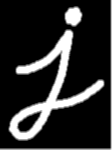

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def applyPadding(array,x):
  new = np.zeros((array.shape[0]+(2*x),array.shape[1]+(2*x),array.shape[2]),dtype = array.dtype)
  for s in range(array.shape[2]):
    for i in range(array.shape[0]):
      for j in range(array.shape[1]):
        new[i+int(x/2),j+int(x/2),s] = array[i,j,s]
  return new

def applyKernel(kernel,matrix):
  padded_Matrix = applyPadding(matrix,int((kernel.shape[0]-1)/2))
  print(padded_Matrix.shape)
  filtered = np.zeros((matrix.shape[0],matrix.shape[1],matrix.shape[2]),dtype = matrix.dtype)
  for s in range(matrix.shape[2]):
    for i in range(matrix.shape[0]):
      for j in range(matrix.shape[1]):
        sum = 0.0
        for y in range(kernel.shape[0]):
          for x in range(kernel.shape[1]):
            sum = sum + kernel[y,x]*padded_Matrix[i+y,j+x,s]
        filtered[i,j,s] = sum
  return filtered     
image = plt.imread('morphological.png')
# option =int(input('Choose and option\n1)Vertical Edge detection\n2)Horizontal Edge detection\n3)Sobel edge detection\n4)Canny Edge Detection'))
print(image.shape)
kernel_box = np.array([[1,2,1],[1,2,1],[1,2,1]])
filtered = applyKernel(kernel_box,image)
filtered *= 255.0/filtered.max()

# plt.imshow(image)
# print(filtered)
cv2_imshow(filtered)

TypeError: ignored

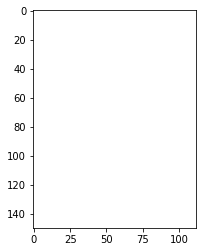

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
default_structure = np.ones((3, 3))

def idx_check(index):
    if index < 0:
        return 0
    else:
        return index

def dilation(binary_img_matrix = None, structuring_element = default_structure):
    binary_img_matrix = np.asarray(binary_img_matrix)
    structuring_element = np.asarray(structuring_element)
    ste_shp = structuring_element.shape
    dilated_img = np.zeros((binary_img_matrix.shape[0], binary_img_matrix.shape[1]))
    ste_origin = ((structuring_element.shape[0]-1)/2, (structuring_element.shape[1]-1)/2)
    for i in range(len(binary_img_matrix)):
        for j in range(len(binary_img_matrix[0])):
            overlap = binary_img_matrix[idx_check(i - ste_origin[0]):i + (ste_shp[0] - ste_origin[0]), idx_check(j - ste_origin[1]):j + (ste_shp[1] - ste_origin[1])]
            shp = overlap.shape

            ste_first_row_idx = int(np.fabs(i - ste_origin[0])) if i - ste_origin[0] < 0 else 0
            ste_first_col_idx = int(np.fabs(j - ste_origin[1])) if j - ste_origin[1] < 0 else 0

            ste_last_row_idx = ste_shp[0] - 1 - (i + (ste_shp[0] - ste_origin[0]) - binary_img_matrix.shape[0]) if i + (ste_shp[0] - ste_origin[0]) > binary_img_matrix.shape[0] else ste_shp[0]-1
            ste_last_col_idx = ste_shp[1] - 1 - (j + (ste_shp[1] - ste_origin[1]) - binary_img_matrix.shape[1]) if j + (ste_shp[1] - ste_origin[1]) > binary_img_matrix.shape[1] else ste_shp[1]-1

            if shp[0] != 0 and shp[1] != 0 and np.logical_and(structuring_element[ste_first_row_idx:ste_last_row_idx+1, ste_first_col_idx:ste_last_col_idx+1], overlap).any():
                dilated_img[i, j] = 1
    return dilated_img

def erosion(binary_img_matrix = None, structuring_element = default_structure):
    binary_img_matrix = np.asarray(binary_img_matrix)
    structuring_element = np.asarray(structuring_element)
    ste_shp = structuring_element.shape
    eroded_img = np.zeros((binary_img_matrix.shape[0], binary_img_matrix.shape[1]))
    ste_origin = (int(np.ceil((structuring_element.shape[0] - 1) / 2.0)), int(np.ceil((structuring_element.shape[1] - 1) / 2.0)))
    for i in range(len(binary_img_matrix)):
        for j in range(len(binary_img_matrix[0])):
            overlap = binary_img_matrix[idx_check(i - ste_origin[0]):i + (ste_shp[0] - ste_origin[0]),
                      idx_check(j - ste_origin[1]):j + (ste_shp[1] - ste_origin[1])]
            shp = overlap.shape
            ste_first_row_idx = int(np.fabs(i - ste_origin[0])) if i - ste_origin[0] < 0 else 0
            ste_first_col_idx = int(np.fabs(j - ste_origin[1])) if j - ste_origin[1] < 0 else 0

            ste_last_row_idx = ste_shp[0] - 1 - (i + (ste_shp[0] - ste_origin[0]) - binary_img_matrix.shape[0]) if i + (ste_shp[0] - ste_origin[0]) > binary_img_matrix.shape[0] else ste_shp[0]-1
            ste_last_col_idx = ste_shp[1] - 1 - (j + (ste_shp[1] - ste_origin[1]) - binary_img_matrix.shape[1]) if j + (ste_shp[1] - ste_origin[1]) > binary_img_matrix.shape[1] else ste_shp[1]-1

            if shp[0] != 0 and shp[1] != 0 and np.array_equal(np.logical_and(overlap, structuring_element[ste_first_row_idx:ste_last_row_idx+1,
                                                                       ste_first_col_idx:ste_last_col_idx+1]),structuring_element[ste_first_row_idx:ste_last_row_idx+1,
                                                                       ste_first_col_idx:ste_last_col_idx+1]):
                eroded_img[i, j] = 1
    return eroded_img
def binary(matrix):
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      if matrix.any()<125:
        matrix[i,j] = 0
      else:
        matrix[i,j] = 1
  return matrix
image = plt.imread('morphological.png')
image = binary(image)
plt.imshow(image)
filtered = dilation(image)
plt.imshow(filtered)
